In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


This automatically converts non-numeric values to NaN.

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [9]:
df = df.dropna()
df.shape

(7032, 21)

These columns are text-based and need encoding.

In [11]:
df.select_dtypes(include=["object"]).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

This will convert columns like:

gender → 0/1

InternetService → 0/1/2

Contract → 0/1/2

Churn → 0/1 (important target column)

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=["object"]).columns:
    df[col] = le.fit_transform(df[col])

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


Machine learning needs:

Training data → to learn patterns

Testing data → to check accuracy

In [14]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df.drop("Churn", axis=1)
y = df["Churn"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5625, 20), (1407, 20))

We will use Logistic Regression because:

it’s perfect for churn prediction

simple

powerful

easy to explain in interviews

used in many companies

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [17]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7782515991471215

In [18]:
#Logistic Regression has coefficients that tell us how each feature affects churn.
import numpy as np

# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_[0])
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

feature_importance.head(10)

,feature,importance
15,Contract,0.602026
6,PhoneService,0.336940
9,OnlineSecurity,0.336473
12,TechSupport,0.331554
2,SeniorCitizen,0.266900
16,PaperlessBilling,0.252732
4,Dependents,0.217546
7,MultipleLines,0.105772
10,OnlineBackup,0.101965
14,StreamingMovies,0.075134


In [19]:
import matplotlib.pyplot as plt

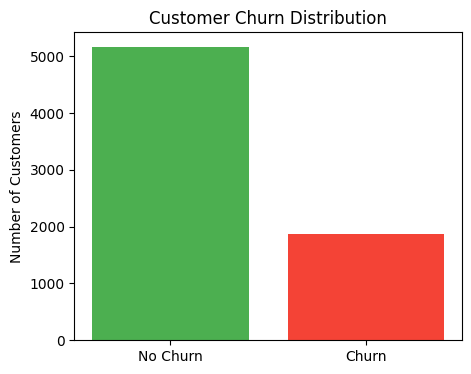

In [20]:
churn_counts = df["Churn"].value_counts()

plt.figure(figsize=(5,4))
plt.bar(["No Churn", "Churn"], churn_counts, color=["#4CAF50", "#F44336"])
plt.title("Customer Churn Distribution")
plt.ylabel("Number of Customers")
plt.show()

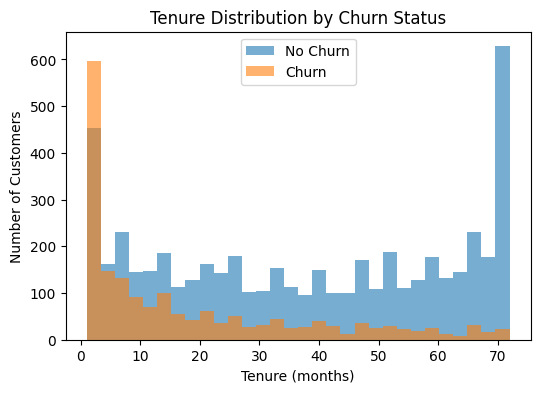

In [21]:
plt.figure(figsize=(6,4))
plt.hist(df[df["Churn"] == 0]["tenure"], bins=30, alpha=0.6, label="No Churn")
plt.hist(df[df["Churn"] == 1]["tenure"], bins=30, alpha=0.6, label="Churn")
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

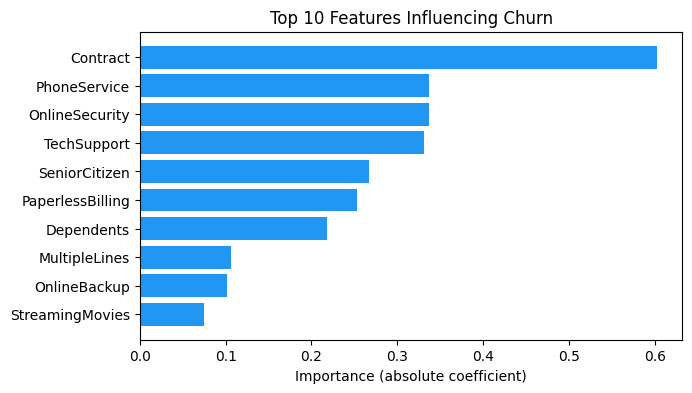

In [22]:
top_features = feature_importance.head(10)

plt.figure(figsize=(7,4))
plt.barh(top_features["feature"], top_features["importance"], color="#2196F3")
plt.xlabel("Importance (absolute coefficient)")
plt.title("Top 10 Features Influencing Churn")
plt.gca().invert_yaxis()  # so most important is at top
plt.show()